In [ ]:
pip install pandas matplotlib scikit-learn


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

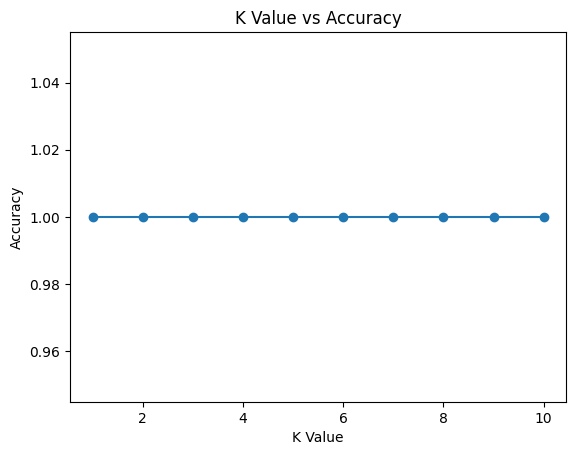

Best K: 1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1, 11)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy")
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best K:", best_k)


Final Accuracy: 1.0


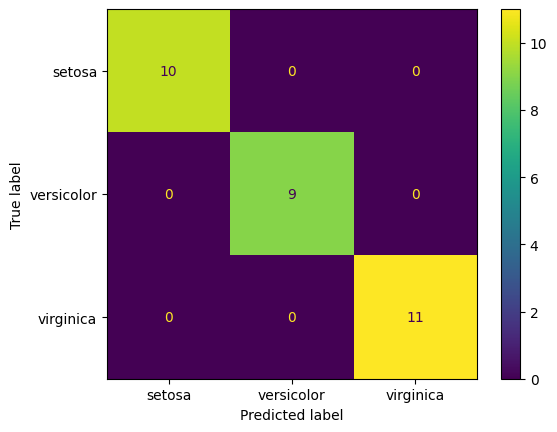

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train with best K
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Accuracy
print("Final Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()
plt.show()


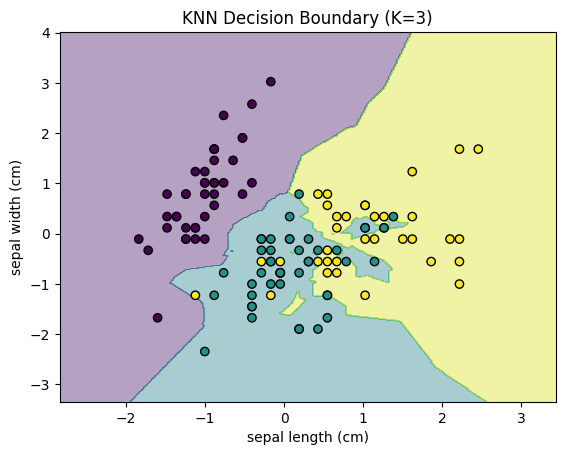

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

best_k = 3  # Or find using loop
X_vis = X_train[:, :2]
y_vis = y_train

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()

